# Table of Contents
   
1. Introduction
2. Import Data and Feature Engineering
3. Data Analysis and Visualization
4. Machine Learning
5. Closing

# Introduction

# Import Data and Feature Engineering

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")  
import matplotlib as mpl

from IPython.display import display

## Import Data

### Import first 2016 dataset

In [2]:
#read 2016 property file
train2016_df = pd.read_csv("../Data/train_2016_v2.csv")
train2016_df.columns

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [3]:
train2016_df.shape

(90275, 3)

In [4]:
display(train2016_df.dtypes)

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [5]:
display(train2016_df.head())

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


I will change date column to a more readable format and extract month data

In [6]:
train2016_df["TransDate"] = pd.to_datetime(train2016_df.transactiondate)
train2016_df["transactionMonth"] = train2016_df.TransDate.dt.month
train2016_df.drop("transactiondate",inplace=True,axis=1)
display(train2016_df.head(10))
train2016_df.dtypes

,parcelid,logerror,TransDate,transactionMonth
0,11016594,0.0276,2016-01-01,1
1,14366692,-0.1684,2016-01-01,1
2,12098116,-0.0040,2016-01-01,1
3,12643413,0.0218,2016-01-02,1
4,14432541,-0.0050,2016-01-02,1
5,11509835,-0.2705,2016-01-02,1
6,12286022,0.0440,2016-01-02,1
7,17177301,0.1638,2016-01-02,1
8,14739064,-0.0030,2016-01-02,1
9,14677559,0.0843,2016-01-03,1


parcelid                     int64
logerror                   float64
TransDate           datetime64[ns]
transactionMonth             int64
dtype: object

### Import second 2016 dataset

In [7]:
data2016_df = pd.read_csv("../Data/properties_2016.csv")
data2016_df.head(10)

/Users/wenhuizhang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [8]:
data2016_df.shape

(2985217, 58)

In [9]:
problem_df = data2016_df.iloc[:,[22,32,34,49,55]]
problem_df.head(20)

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
0,NaN,010D,NaN,NaN,NaN
1,NaN,0109,LCA11*,NaN,NaN
2,NaN,1200,LAC2,NaN,NaN
3,NaN,1200,LAC2,NaN,NaN
4,NaN,1210,LAM1,NaN,NaN
5,NaN,1210,LAC4,NaN,NaN
6,NaN,010V,LAC2,NaN,NaN
7,NaN,1210,BUC4YY,NaN,NaN
8,NaN,010D,BUR1*,NaN,NaN
9,NaN,1210,SFC2*,NaN,NaN


It seems that the four columns of data that caused warning not only have mixed data types, but also have either some data that I couldn't translate or have too many NaN data, therefore I will just drop these data

In [10]:
data2016_df.drop(data2016_df.columns[[22,32,34,49,55]], axis=1, inplace=True)

In [11]:
data2016_df.shape

(2985217, 53)

### Merge two 2016 dataframes together

In [15]:
full2016_df = pd.merge(train2016_df, data2016_df, how = 'inner', on = ['parcelid'])
full2016_df.shape

(90275, 56)

In [17]:
full2016_df.head(5)

,parcelid,logerror,TransDate,transactionMonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,6.059042e+13


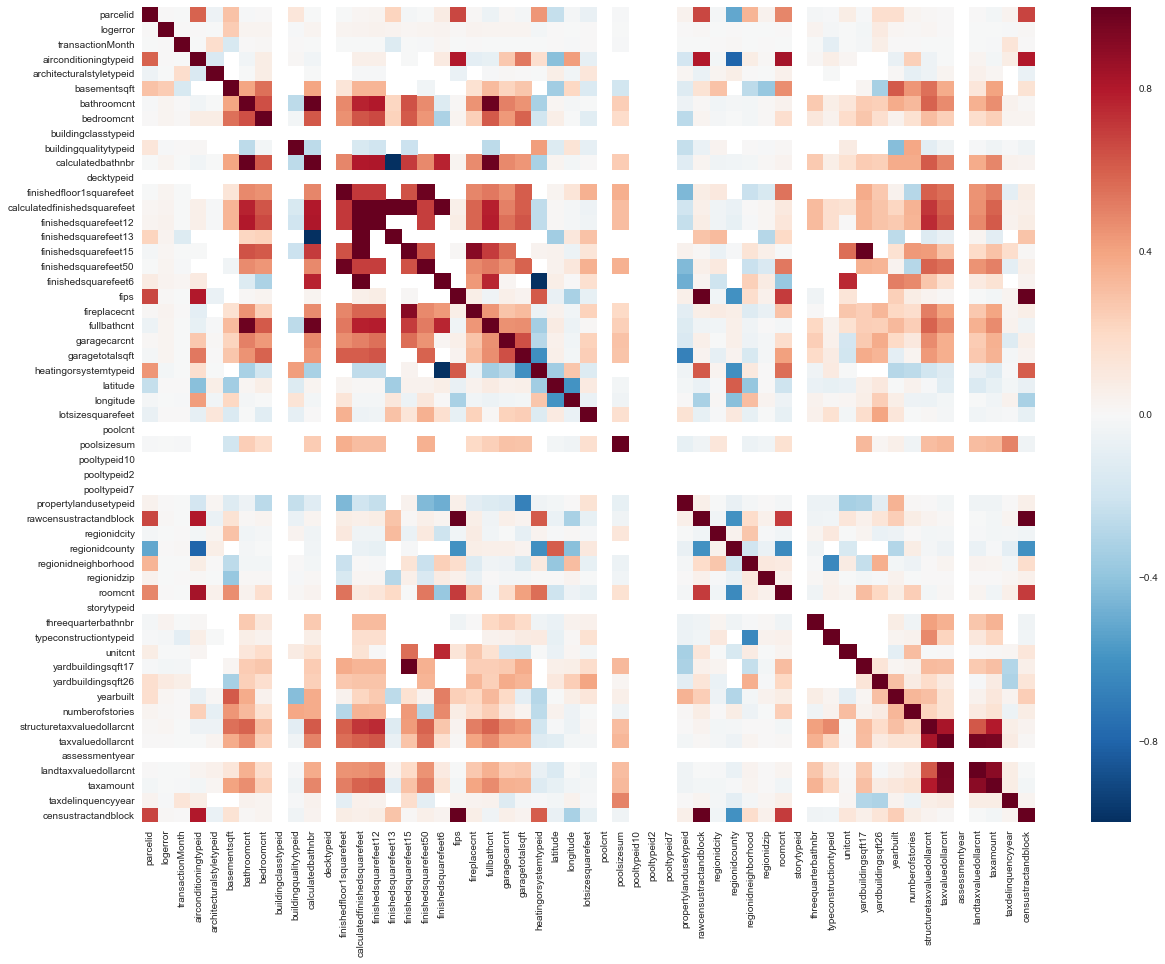

In [49]:
plt.subplots(figsize=(20,15))
sns.heatmap(full2016_df.corr())
#print (full2016_df.corr())

In [88]:
bas_col = ['parcelid','logerror','TransDate','transactionMonth']
loc_col_interest = ['parcelid','regionidzip', 'latitude', 'longitude']
cat_col_interest = ['parcelid','heatingorsystemtypeid', 'propertylandusetypeid']
num_col_interest = ['parcelid','finishedsquarefeet12', 'lotsizesquarefeet', 'bedroomcnt', 'bathroomcnt', 'yearbuilt', 'assessmentyear']

### Analyze Null Values

In [18]:
null_No = full2016_df.isnull().sum()

In [19]:
null_ratio = null_No/90275

In [25]:
nullRatio = pd.DataFrame(null_ratio,columns=["Null Ratio"])

In [27]:
nullRatio.tail(5)

,Null Ratio
assessmentyear,0.000000
landtaxvaluedollarcnt,0.000011
taxamount,0.000066
taxdelinquencyyear,0.980249
censustractandblock,0.006702


In [81]:
y_pos = np.arange(len(col_names))

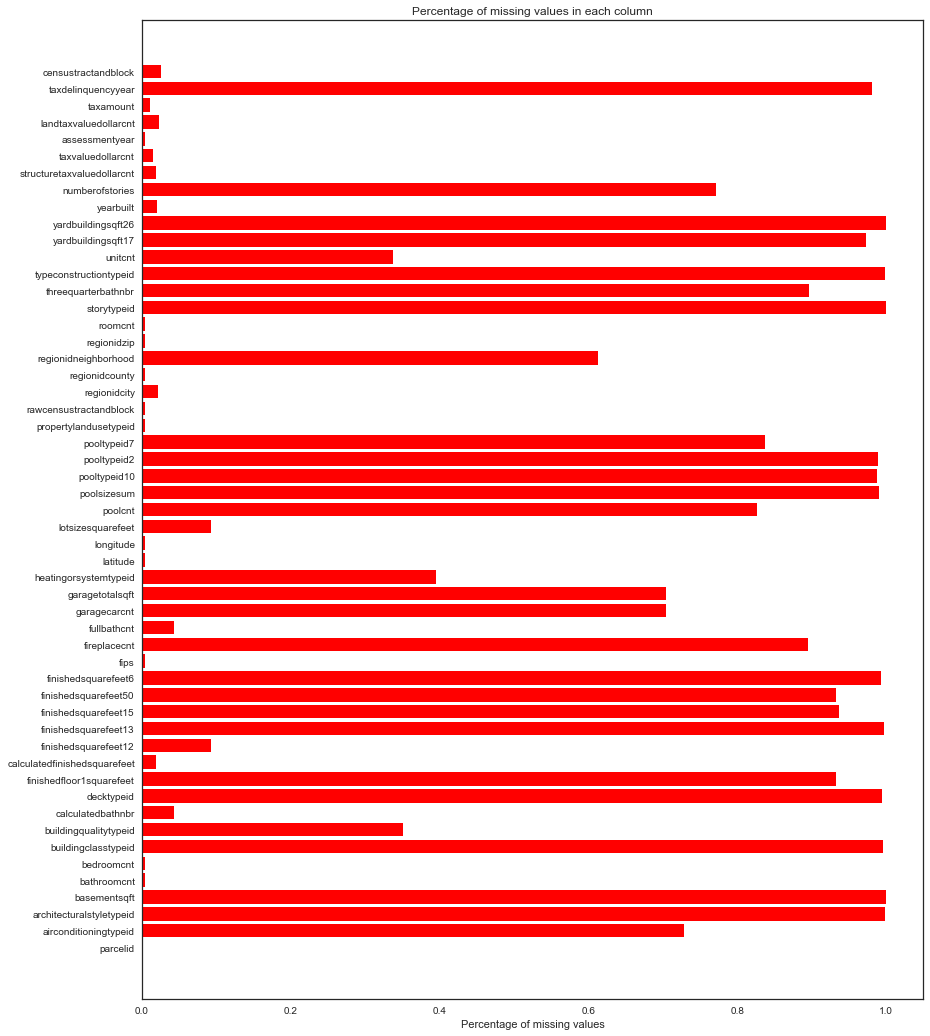

In [134]:
fig, ax = plt.subplots(figsize=(14,18))
plt.barh(y_pos, null_ratio, align='center', color='red')
plt.yticks(y_pos, col_names);
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values in each column")

In [28]:
nullRatio.sort_values("Null Ratio",ascending=True,inplace=True)

In [29]:
nullRatio.tail(5)

,Null Ratio
yardbuildingsqft26,0.998948
storytypeid,0.999524
basementsqft,0.999524
finishedsquarefeet13,0.999634
buildingclasstypeid,0.999823


In [30]:
col_name = nullRatio.index

In [31]:
y_pos = np.arange(len(col_name))

### Fill in Null Values
null values are filled in differently according to their different types

In [90]:
basic_df = full2016_df[bas_col]
display(basic_df.isnull().sum())

parcelid            0
logerror            0
TransDate           0
transactionMonth    0
dtype: int64

In [38]:
location_df = full2016_df[loc_col_interest]
location_df_new = location_df.fillna(0.0)

In [43]:
display(location_df.isnull().sum())
display(location_df_new.isnull().sum())

parcelid        0
regionidzip    35
latitude        0
longitude       0
dtype: int64

parcelid       0
regionidzip    0
latitude       0
longitude      0
dtype: int64

In [50]:
cat_df = full2016_df[cat_col_interest]

In [67]:
cat_df.isnull().sum()

parcelid                     0
heatingorsystemtypeid    34195
propertylandusetypeid        0
dtype: int64

In [66]:
#function to return the most frequent value in a pandas Series
def get_most_frequent_value(my_column):
    return my_column.value_counts().index[0]

most_frequent_values_per_column = cat_df[cat_col_interest[1:]].apply(get_most_frequent_value,axis=0)
print ("Most frequent value in each column:\n",most_frequent_values_per_column)

Most frequent value in each column:
 heatingorsystemtypeid      2.0
propertylandusetypeid    261.0
dtype: float64


In [72]:
cat_df.loc[:,1:] = cat_df[cat_col_interest[1:]].fillna(most_frequent_values_per_column,axis=0)
display(cat_df.isnull().sum())
display(cat_df.apply(get_most_frequent_value,axis=0))

/Users/wenhuizhang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


parcelid                 0
heatingorsystemtypeid    0
propertylandusetypeid    0
dtype: int64

parcelid                 11842707.0
heatingorsystemtypeid           2.0
propertylandusetypeid         261.0
dtype: float64

In [83]:
numeric_df = full2016_df[num_col_interest]

In [85]:
median_per_column = numeric_df[num_col_interest[1:]].apply(lambda x: x.median(),axis=0)
print ("Median value per column:\n",median_per_column)
print("\nNumber of missing values per column")
print(numeric_df.isnull().sum())

Median value per column:
 finishedsquarefeet12    1518.0
lotsizesquarefeet       7200.0
bedroomcnt                 3.0
bathroomcnt                2.0
yearbuilt               1970.0
assessmentyear          2015.0
dtype: float64

Number of missing values per column
parcelid                    0
finishedsquarefeet12     4679
lotsizesquarefeet       10150
bedroomcnt                  0
bathroomcnt                 0
yearbuilt                 756
assessmentyear              0
dtype: int64


In [86]:
numeric_df.loc[:,1:] = numeric_df[num_col_interest[1:]].fillna(median_per_column,axis=0)
display(numeric_df.isnull().sum())
display(numeric_df.head(10))

/Users/wenhuizhang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


parcelid                0
finishedsquarefeet12    0
lotsizesquarefeet       0
bedroomcnt              0
bathroomcnt             0
yearbuilt               0
assessmentyear          0
dtype: int64

,parcelid,finishedsquarefeet12,lotsizesquarefeet,bedroomcnt,bathroomcnt,yearbuilt,assessmentyear
0,11016594,1684.0,7528.0,3.0,2.0,1959.0,2015.0
1,14366692,2263.0,3643.0,4.0,3.5,2014.0,2015.0
2,12098116,2217.0,11423.0,2.0,3.0,1940.0,2015.0
3,12643413,839.0,70859.0,2.0,2.0,1987.0,2015.0
4,14432541,2283.0,6000.0,4.0,2.5,1981.0,2015.0
5,11509835,3067.0,2708.0,4.0,4.0,1982.0,2015.0
6,12286022,1297.0,6677.0,2.0,1.0,1939.0,2015.0
7,17177301,1763.0,7200.0,3.0,2.5,1994.0,2015.0
8,14739064,796.0,7200.0,2.0,1.0,1984.0,2015.0
9,14677559,1260.0,7200.0,2.0,2.0,1977.0,2015.0


In [101]:
merge2016_1 = pd.merge(basic_df,numeric_df, on = 'parcelid')
merge2016_2 = pd.merge(merge2016_1,cat_df, on = 'parcelid')
merge2016_df = pd.merge(merge2016_2,location_df, on = 'parcelid')
merge2016_df.head(5)

,parcelid,logerror,TransDate,transactionMonth,finishedsquarefeet12,lotsizesquarefeet,bedroomcnt,bathroomcnt,yearbuilt,assessmentyear,heatingorsystemtypeid,propertylandusetypeid,regionidzip,latitude,longitude
0,11016594,0.0276,2016-01-01,1,1684.0,7528.0,3.0,2.0,1959.0,2015.0,2.0,261.0,96370.0,34280990.0,-118488536.0
1,14366692,-0.1684,2016-01-01,1,2263.0,3643.0,4.0,3.5,2014.0,2015.0,2.0,261.0,96962.0,33668120.0,-117677556.0
2,12098116,-0.0040,2016-01-01,1,2217.0,11423.0,2.0,3.0,1940.0,2015.0,2.0,261.0,96293.0,34136312.0,-118175032.0
3,12643413,0.0218,2016-01-02,1,839.0,70859.0,2.0,2.0,1987.0,2015.0,2.0,266.0,96222.0,33755800.0,-118309000.0
4,14432541,-0.0050,2016-01-02,1,2283.0,6000.0,4.0,2.5,1981.0,2015.0,2.0,261.0,96961.0,33485643.0,-117700234.0


### Scale numeric features

In [116]:
X = merge2016_df.iloc[:,3:-5]
Y = merge2016_df.logerror
col_names = X.columns
display(col_names)

Index(['transactionMonth', 'finishedsquarefeet12', 'lotsizesquarefeet',
       'bedroomcnt', 'bathroomcnt', 'yearbuilt', 'assessmentyear'],
      dtype='object')

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create a scaler object
scaler.fit(X) #fit the scaler
X_scaled = scaler.transform(X) #transform the data with it
X_new = pd.DataFrame(X_scaled,columns=col_names)
X_new.head(5)

,transactionMonth,finishedsquarefeet12,lotsizesquarefeet,bedroomcnt,bathroomcnt,yearbuilt,assessmentyear
0,-1.720062,-0.056166,-0.166615,-0.026662,-0.276710,-0.398037,0.0
1,-1.720062,0.596837,-0.200709,0.835022,1.214484,1.924317,0.0
2,-1.720062,0.544958,-0.132433,-0.888346,0.717420,-1.200304,0.0
3,-1.720062,-1.009168,0.389171,-0.888346,-0.276710,0.784252,0.0
4,-1.720062,0.619394,-0.180024,0.835022,0.220355,0.530905,0.0


## Data Analysis and Visualization

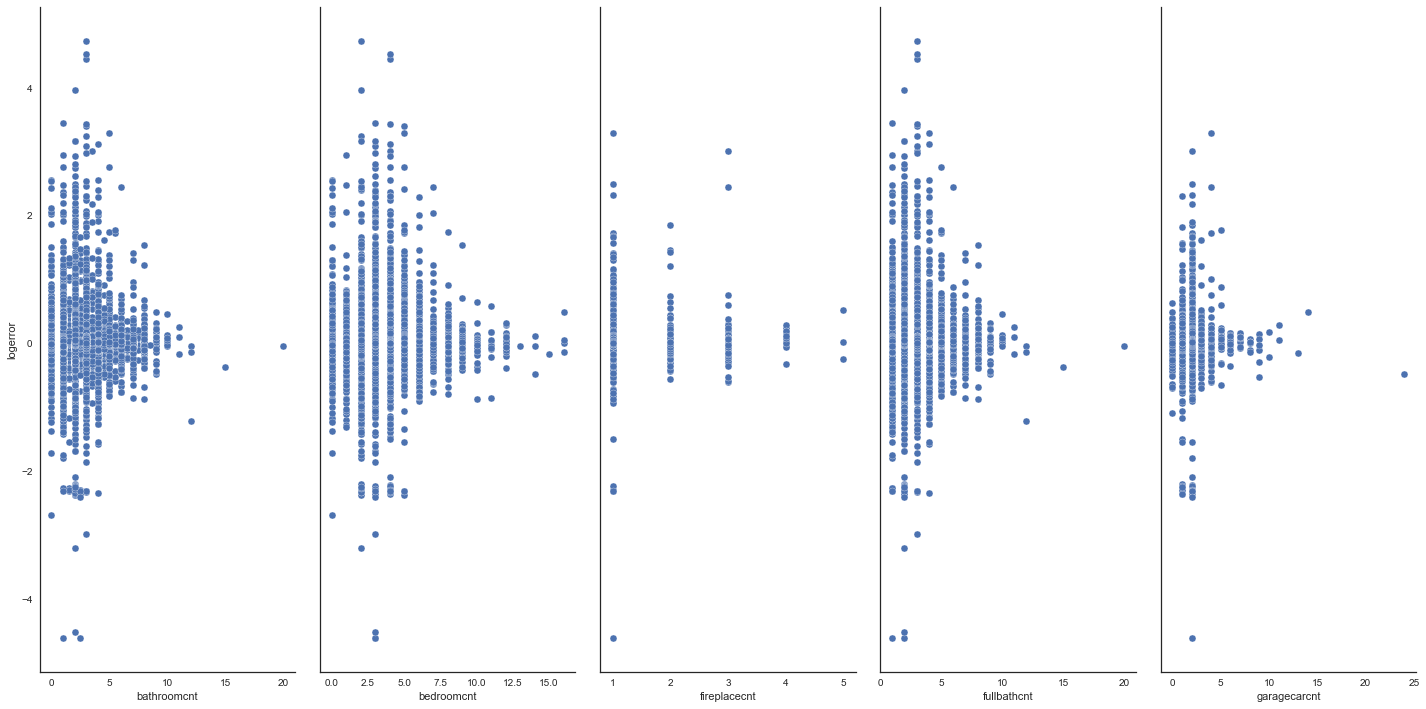

In [133]:
sns.pairplot(full2016_df, x_vars=cnt_col_name[0:5], y_vars='logerror', size=10, aspect=0.4);

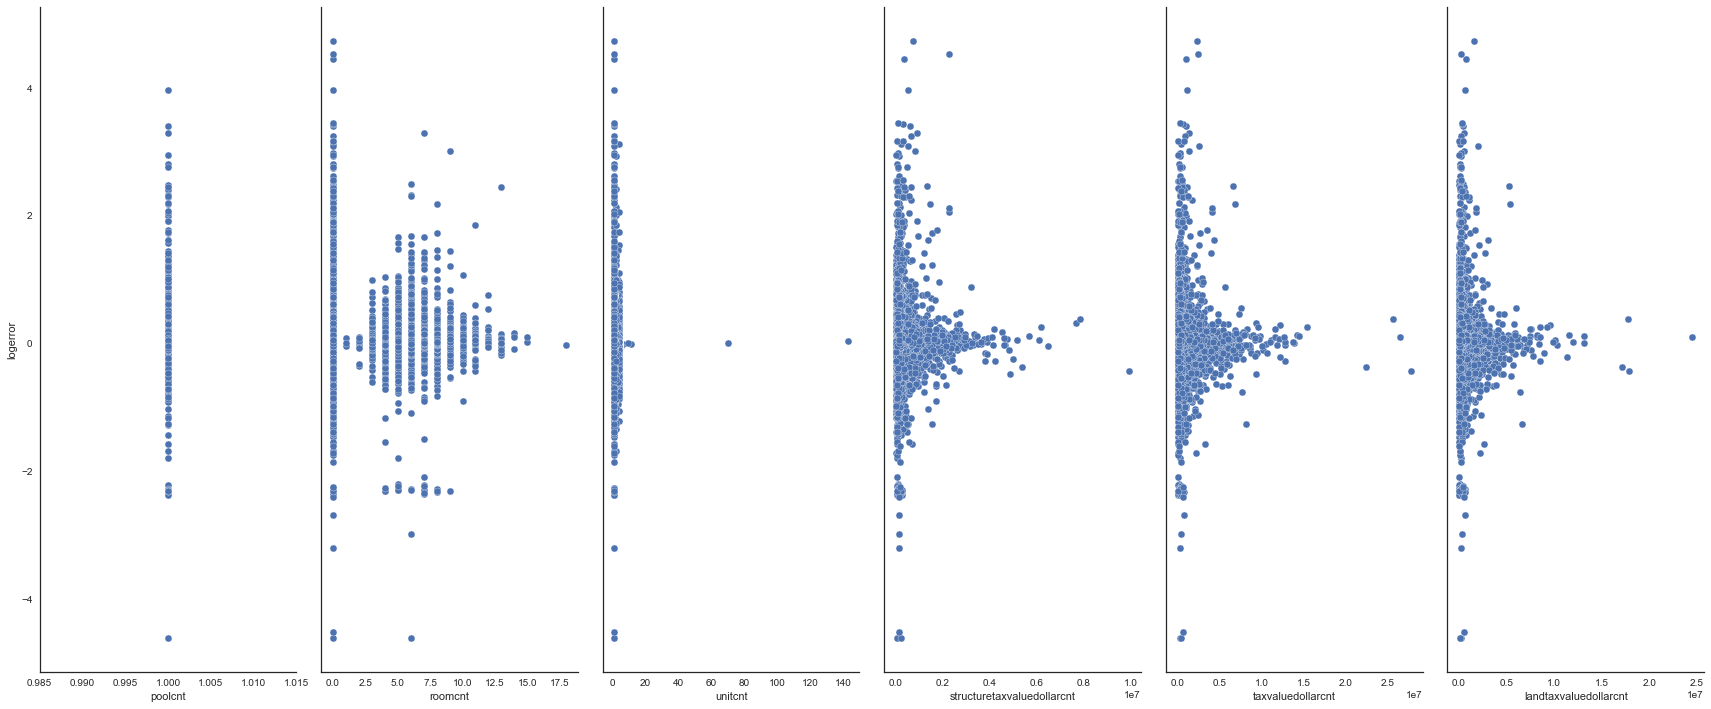

In [134]:
sns.pairplot(full2016_df, x_vars=cnt_col_name[5:], y_vars='logerror', size=10, aspect=0.4);

In [140]:
area_col_name1 = full2016_df.columns[full2016_df.columns.str.contains(pat = 'sqft')]
area_col_name2 = full2016_df.columns[full2016_df.columns.str.contains(pat = 'squarefeet')]
print(area_col_name1, area_col_name2)
display(area_col_name1.shape)
display(area_col_name2.shape)

Index(['basementsqft', 'garagetotalsqft', 'yardbuildingsqft17',
       'yardbuildingsqft26'],
      dtype='object') Index(['finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'lotsizesquarefeet'],
      dtype='object')


(4,)

(8,)

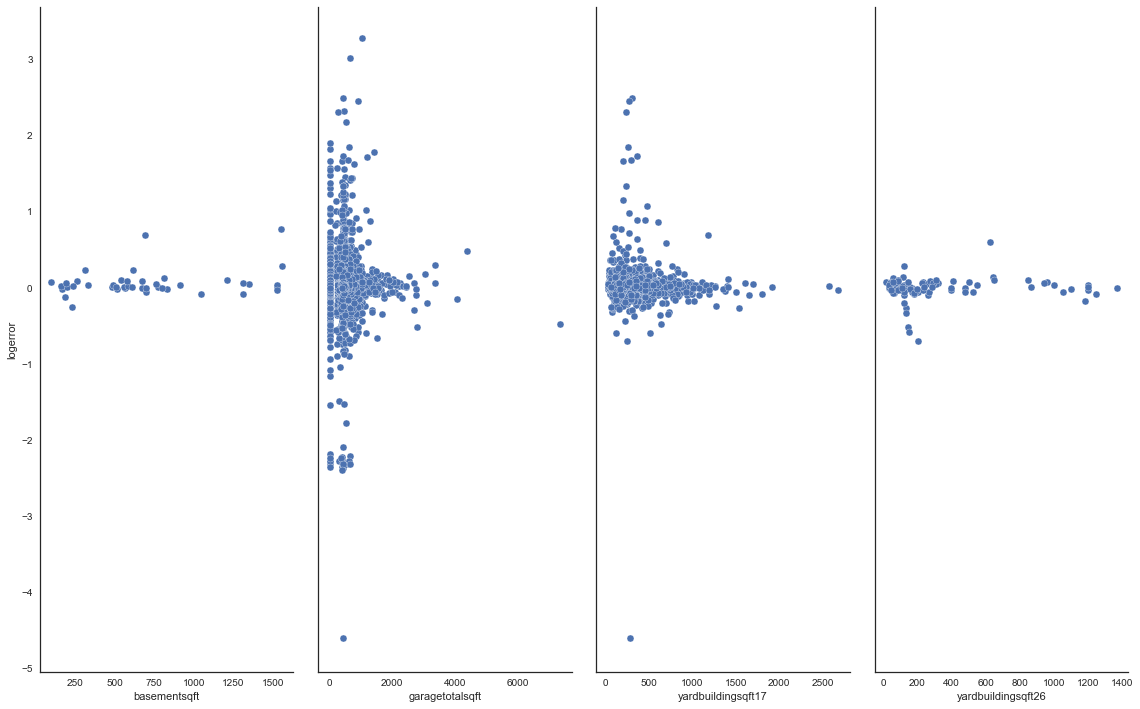

In [141]:
sns.pairplot(full2016_df, x_vars=area_col_name1, y_vars='logerror', size=10, aspect=0.4);

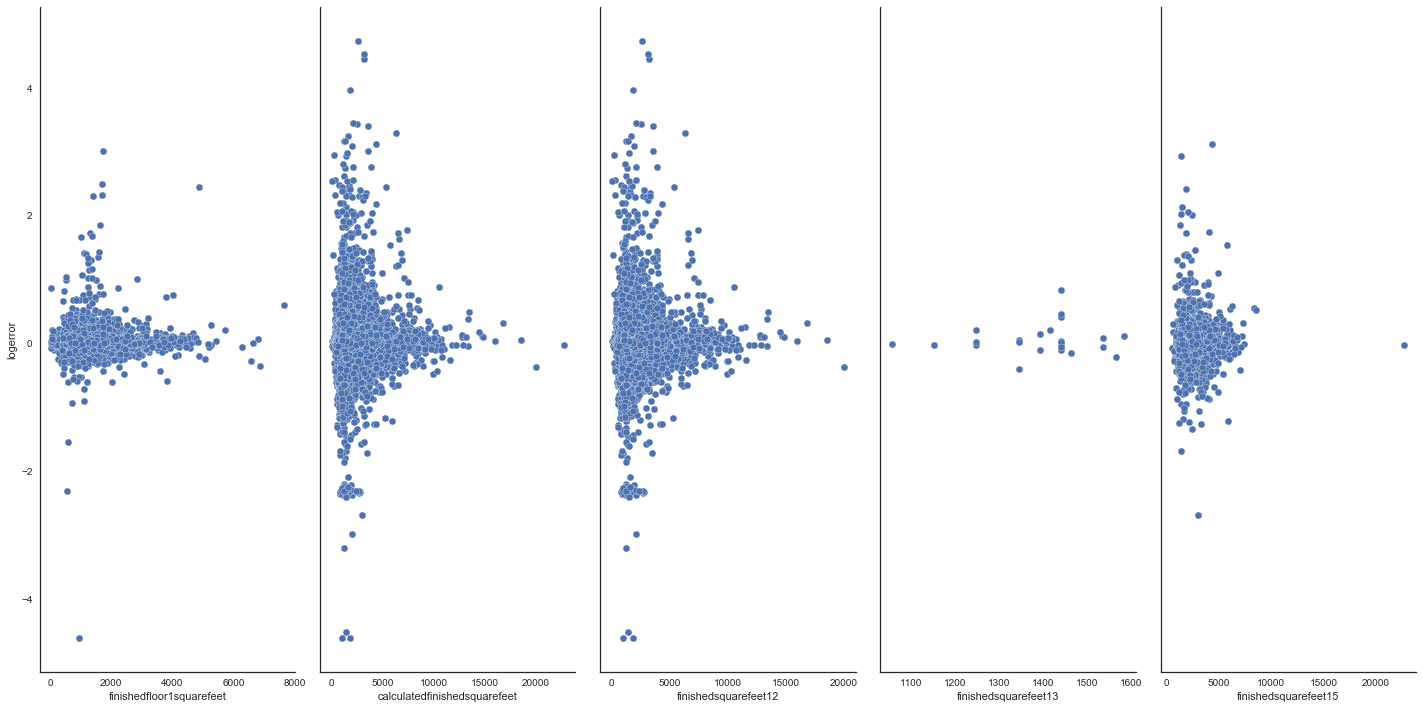

In [142]:
sns.pairplot(full2016_df, x_vars=area_col_name2[0:5], y_vars='logerror', size=10, aspect=0.4);

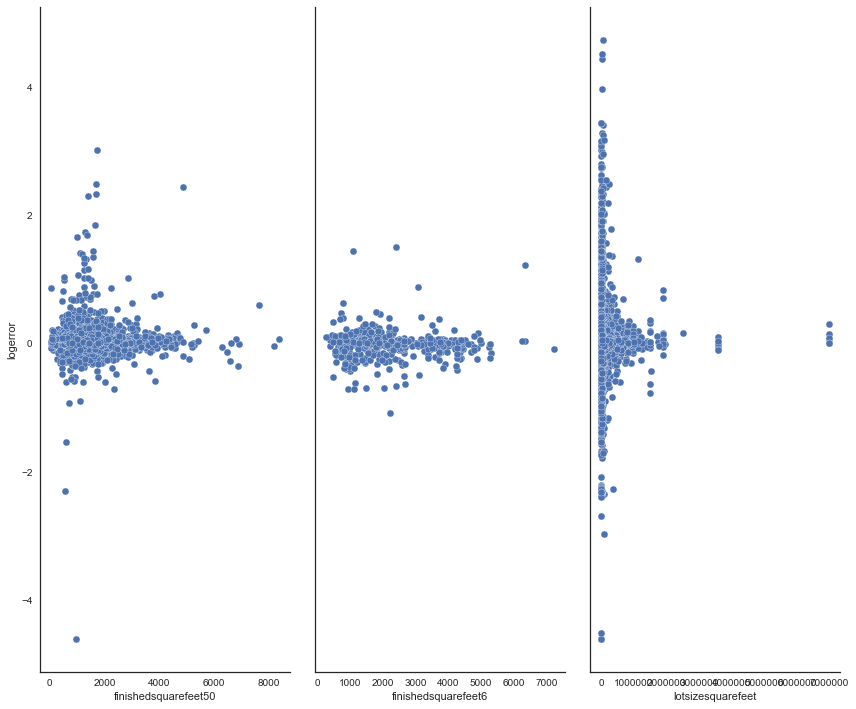

In [143]:
sns.pairplot(full2016_df, x_vars=area_col_name2[5:], y_vars='logerror', size=10, aspect=0.4);

In summary, among all the 56 features, 12 are categorical features that are certain types; 11 are about the count/number of certain items; 12 are related with the area/sqft of certain things; about 21 are something else, such as related with time or location

In [154]:
m = max(full2016_df.logerror)
full2016_df.scalederror = abs(full2016_df.logerror/m)+0.1

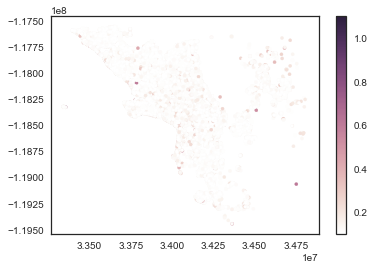

In [155]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(full2016_df.latitude, full2016_df.longitude, c=full2016_df.scalederror, s=10, cmap=cmap)
f.colorbar(points)